In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\OCD Patient Dataset_ Demographics & Clinical Data.csv")

In [3]:
# Display the first few rows of the dataset
print(df.head())

   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1           

In [4]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [5]:
# Check for missing values
print(df.isnull().sum())

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64


In [6]:
# Summary statistics for numerical columns
print(df.describe())

        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                     9.00000  
50%                    20.0

In [7]:
# Summary statistics for categorical columns
print(df.describe(include=['O']))

       Gender  Ethnicity Marital Status Education Level OCD Diagnosis Date  \
count    1500       1500           1500            1500               1500   
unique      2          4              3               4               1218   
top      Male  Caucasian         Single    Some College         2017-06-21   
freq      753        398            511             394                  4   

       Previous Diagnoses Family History of OCD Obsession Type  \
count                1252                  1500           1500   
unique                  4                     2              5   
top                   MDD                   Yes   Harm-related   
freq                  345                   760            333   

       Compulsion Type Depression Diagnosis Anxiety Diagnosis     Medications  
count             1500                 1500              1500            1114  
unique               5                    2                 2               3  
top            Washing                

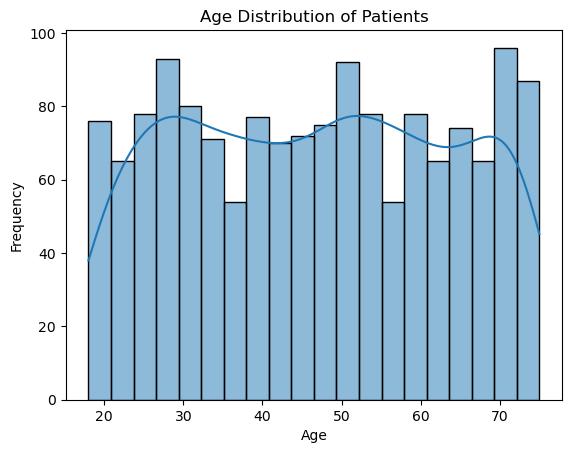

In [8]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

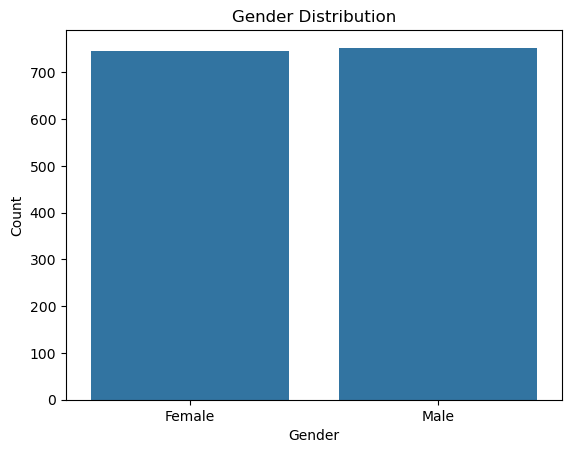

In [9]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

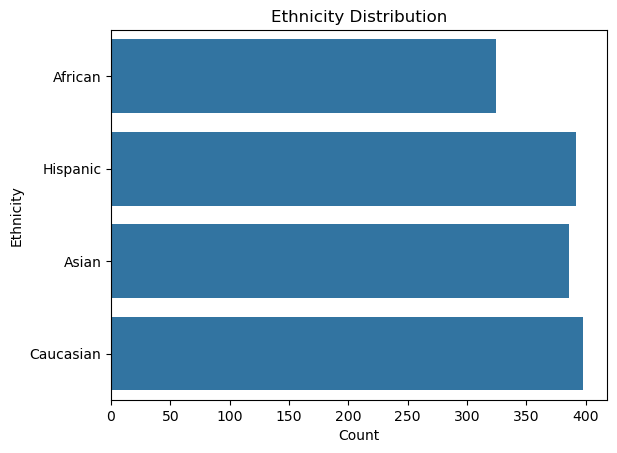

In [10]:
# Ethnicity distribution
sns.countplot(y='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

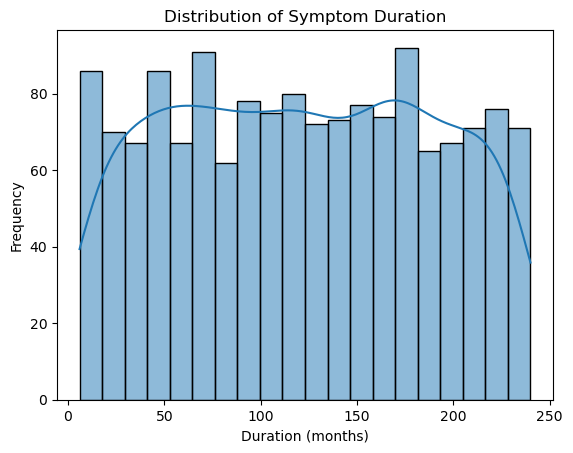

In [11]:
# Distribution of symptom duration
sns.histplot(df['Duration of Symptoms (months)'], bins=20,
kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()

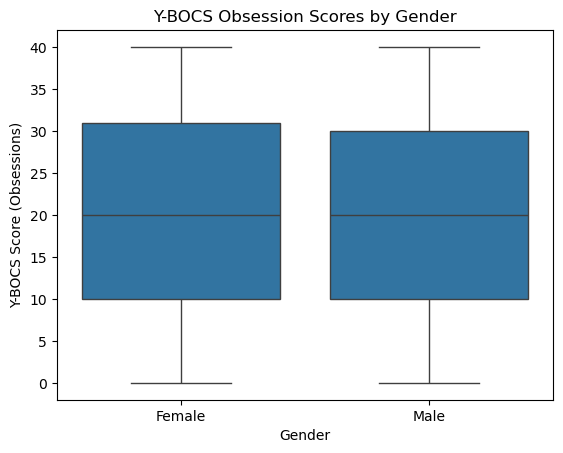

In [12]:
# Boxplot of Y-BOCS Scores by Gender
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.show()

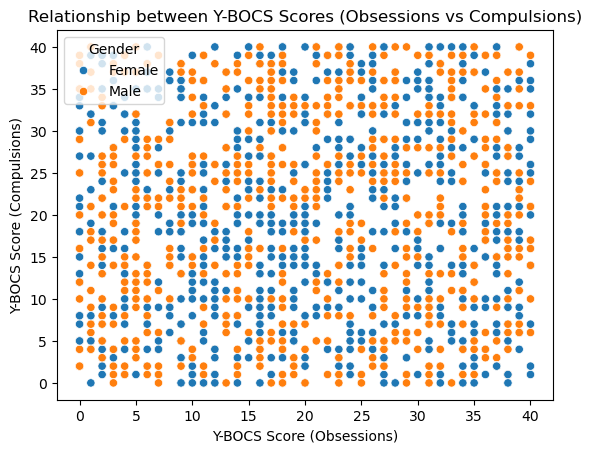

In [14]:
# Relationship between Obsession and Compulsion Y-BOCS Scores
sns.scatterplot(
    x='Y-BOCS Score (Obsessions)',
    y='Y-BOCS Score (Compulsions)',
    hue='Gender',
    data=df
)

plt.title('Relationship between Y-BOCS Scores (Obsessions vs Compulsions)')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

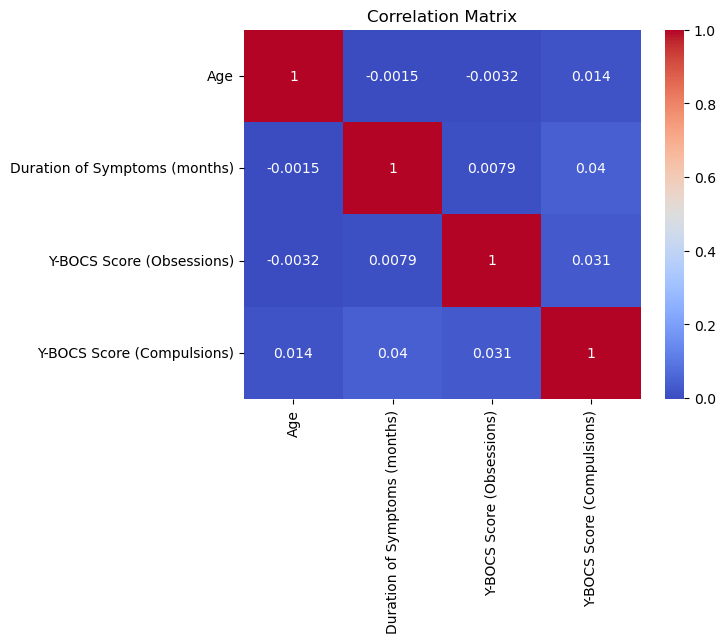

In [15]:
# Correlation matrix
corr_matrix = df[['Age',
                  'Duration of Symptoms (months)',
                  'Y-BOCS Score (Obsessions)',
                  'Y-BOCS Score (Compulsions)']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()